In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem

import openpyxl
import os
from pathlib import Path

In [4]:
%matplotlib inline

In [5]:
TOP = Path.cwd().as_posix().replace('notebooks','')
raw_dir = Path(TOP) / 'data'/'raw'
interim_dir = Path(TOP) / 'data'/'interim'
external_dir = Path(TOP) / 'data'/'external'
figures_dir = Path(TOP) / 'reports'/'figures/'
processed_dir = Path(TOP) / 'data'/'processed'


In [6]:
df = pd.read_csv(interim_dir/'rax_pairs_200125.csv', index_col = [0])
df

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Tanimoto
1,DTXSID5023378,DTXSID0044496,1,CCCCCC1CCCC(=O)O1,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c882e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1310>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.031746
2,DTXSID5023378,DTXSID4029301,1,Cl[SiH](Cl)Cl,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c884a0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1380>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.000000
3,DTXSID5023378,DTXSID8026488,1,CC1(C)C2CCC(C2)C1=C,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88200>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e13f0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.019231
4,DTXSID5023378,DTXSID0029719,1,CCCCC(CC)COC(=O)CS[Sn](CCCC)(CCCC)SCC(=O)OCC(C...,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88120>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1460>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.057971
5,DTXSID5023378,DTXSID6047105,1,COC1=CC(C)=CC=C1O,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88580>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e14d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.170213
...,...,...,...,...,...,...,...,...,...,...
480938,DTXSID00391682,DTXSID6025804,1,CCCCCCC=C,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e10e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.095238
480939,DTXSID00391682,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1150>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.102041
481633,DTXSID3020205,DTXSID6025804,1,CCCCCCC=C,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e11c0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.101695
481634,DTXSID3020205,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1230>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.106061


In [7]:
final_df = (df.reset_index()
 .assign(pair = lambda df: df.apply(lambda row: tuple(sorted([row["Target"], row["Analogue"]])), axis=1)
        )
.drop_duplicates(subset=["pair"]).drop(columns=["pair"])
)

In [8]:
final_df.shape

(213531, 11)

In [9]:
final_df['Label'].value_counts()

Label
1    210372
0      3159
Name: count, dtype: int64

<Axes: >

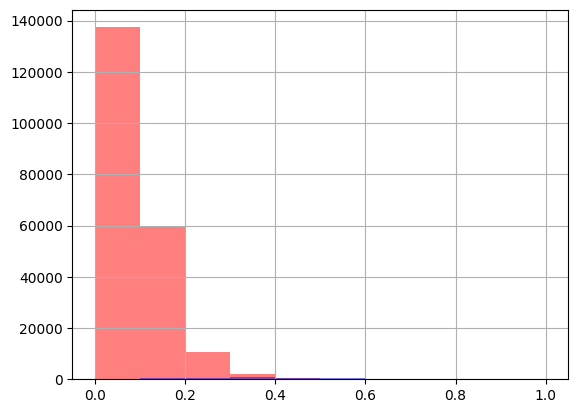

In [10]:
final_df[final_df['Label']==1]['Tanimoto'].hist(color = 'r', alpha = 0.5)
final_df[final_df['Label']==0]['Tanimoto'].hist(color = 'b', alpha = 0.5)

<Axes: >

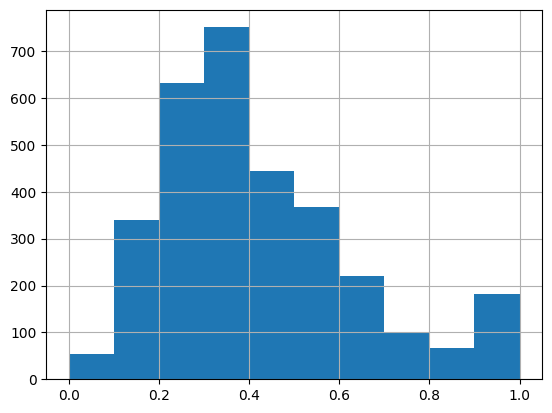

In [11]:
final_df[final_df['Label']==0]['Tanimoto'].hist()

In [12]:
rax_embeddings = pd.read_csv(interim_dir/'rax_txcst_embeddings.csv', index_col = [0])

In [13]:
rax_embeddings.index

Index(['DTXSID4020298', 'DTXSID1020431', 'DTXSID6020430', 'DTXSID6022056',
       'DTXSID0021965', 'DTXSID8026193', 'DTXSID8026195', 'DTXSID1026089',
       'DTXSID6026088', 'DTXSID7024320',
       ...
       'DTXSID8032548', 'DTXSID4034653', 'DTXSID8024315', 'DTXSID2024242',
       'DTXSID8042260', 'DTXSID8024280', 'DTXSID4034869', 'DTXSID9032113',
       'DTXSID0032493', 'DTXSID3023897'],
      dtype='object', name='dtxsid', length=755)

In [14]:
rax_embeddings.index.name = None

In [15]:
rax_embeddings.index.nunique()

654

In [16]:
rax_embeddings = (rax_embeddings.reset_index()
 .drop_duplicates(subset = 'index', keep = 'first')
                  .set_index('index')
)

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
#rax_embeddings.to_dict(orient = 'index')

In [19]:
embeddings_dict = rax_embeddings.to_dict(orient='index')

In [21]:
def get_embed(row):
    h1 = embeddings_dict.get(row['Target'])
    h2 = embeddings_dict.get(row['Analogue'])
    if h1 is not None and h2 is not None:
        h1 = np.array(list(h1.values()))  # Convert dict to NumPy array
        h2 = np.array(list(h2.values()))
        return np.concatenate([np.abs(h1 - h2), h1 * h2]) # Efficient single difference/product computation
    return np.nan 

In [22]:
final_df=(final_df
 .assign(gcn_sim = lambda df:df.apply(get_embed, axis=1))
)

In [23]:
final_df.Label.value_counts()

Label
1    210372
0      3159
Name: count, dtype: int64

In [25]:
final_df.head()

,index,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Tanimoto,gcn_sim
0,1,DTXSID5023378,DTXSID0044496,1,CCCCCC1CCCC(=O)O1,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c882e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1310>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.031746,"[0.041288433799999996, 0.014208216, 0.04185137..."
1,2,DTXSID5023378,DTXSID4029301,1,Cl[SiH](Cl)Cl,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c884a0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1380>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.000000,"[0.0340632032, 0.016780433, 0.1783853550000000..."
2,3,DTXSID5023378,DTXSID8026488,1,CC1(C)C2CCC(C2)C1=C,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88200>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e13f0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.019231,"[0.0418940788, 0.019181462, 0.0495303390000000..."
3,4,DTXSID5023378,DTXSID0029719,1,CCCCC(CC)COC(=O)CS[Sn](CCCC)(CCCC)SCC(=O)OCC(C...,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88120>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1460>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.057971,"[0.027515182800000003, 0.009982728, 0.08866559..."
4,5,DTXSID5023378,DTXSID6047105,1,COC1=CC(C)=CC=C1O,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88580>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e14d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.170213,"[0.0351025382, 0.026523910000000005, 0.0007761..."


In [100]:
import seaborn as sns


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score

In [27]:
final_df = (final_df
 .assign(label =lambda df:df['Label'].apply(lambda x: 1 if x==0 else 0)
        )

)

In [34]:
X = np.vstack(final_df['gcn_sim'].values)

In [35]:

y = final_df.set_index(['Target', 'Analogue'])[['label']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [37]:
cv = StratifiedKFold(n_splits = 5)

In [38]:
clf = LogisticRegression()

In [39]:
results = cross_validate(clf, X_train, y_train.values.ravel(), cv = cv, scoring = {'f1':make_scorer(f1_score)}, return_train_score=True, n_jobs = -1)

In [40]:
results

{'fit_time': array([12.67531013,  9.13239098, 11.77706885,  9.27707839, 11.61480427]),
 'score_time': array([0.03881955, 0.14742684, 0.093256  , 0.12948656, 0.09912229]),
 'test_f1': array([0.1349481 , 0.14802065, 0.13793103, 0.12847222, 0.15306122]),
 'train_f1': array([0.16717458, 0.13562232, 0.12179208, 0.12586806, 0.13863928])}

In [41]:
similar_pairs = final_df[final_df['label'] == 1]
dissimilar_pairs = final_df[final_df['label'] == 0]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [42]:
balanced_df['label'].value_counts()

label
0    3159
1    3159
Name: count, dtype: int64

In [43]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto',
       'gcn_sim', 'label'],
      dtype='object')

In [184]:
balanced_df.to_csv(interim_dir/'balanced_df_icf_300125.csv')

In [44]:
X = np.vstack(balanced_df['gcn_sim'].values)
y = balanced_df.set_index(['Target', 'Analogue'])[['label']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [46]:
results = cross_validate(clf, X_train, y_train.values.ravel(), cv = cv, scoring = {'f1':make_scorer(f1_score)}, return_train_score=True, n_jobs = -1)

In [47]:
results

{'fit_time': array([0.19182062, 0.21224165, 0.19048929, 0.20570207, 0.22762251]),
 'score_time': array([0.00683761, 0.00597334, 0.00580597, 0.00602245, 0.00629234]),
 'test_f1': array([0.88954057, 0.89911851, 0.89555126, 0.90009515, 0.88408644]),
 'train_f1': array([0.90465846, 0.89966069, 0.89966069, 0.90089654, 0.90560544])}

In [48]:
clf.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [49]:
from sklearn.metrics import roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for class 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.9562


In [50]:
y_pred = clf.predict(X_test)

In [51]:
X1 = balanced_df.set_index(['Target', 'Analogue'])[['Tanimoto']]
y1 = balanced_df.set_index(['Target', 'Analogue'])[['label']]

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, test_size = 0.2)

In [53]:
clf1 = LogisticRegression()

In [54]:
results1 = cross_validate(clf1, X_train1, y_train1.values.ravel(), cv = cv, scoring = {'f1':make_scorer(f1_score)}, return_train_score=True, n_jobs = -1)

In [55]:
results1

{'fit_time': array([0.00942779, 0.00789356, 0.01131701, 0.00809717, 0.01592302]),
 'score_time': array([0.00456619, 0.00490522, 0.00766182, 0.0047524 , 0.00488925]),
 'test_f1': array([0.9       , 0.90534979, 0.89762151, 0.89591837, 0.92479675]),
 'train_f1': array([0.90596977, 0.90462797, 0.90653728, 0.90699462, 0.89971788])}

In [56]:
clf1.fit(X_train1, y_train1.values.ravel())

LogisticRegression()

In [57]:
y_prob1 = clf1.predict_proba(X_test1)[:, 1]  # Probability for class 1
roc_auc = roc_auc_score(y_test1, y_prob1)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.9728


In [58]:
y_pred1 = clf1.predict(X_test1)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
confusion_matrix(y_test1,y_pred1)

array([[603,  29],
       [ 76, 556]])

In [61]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       632
           1       0.95      0.88      0.91       632

    accuracy                           0.92      1264
   macro avg       0.92      0.92      0.92      1264
weighted avg       0.92      0.92      0.92      1264



In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.89       632
           1       0.87      0.93      0.90       632

    accuracy                           0.90      1264
   macro avg       0.90      0.90      0.90      1264
weighted avg       0.90      0.90      0.90      1264



In [63]:
confusion_matrix(y_test,y_pred)

array([[547,  85],
       [ 44, 588]])